In [ ]:
# https://towardsdatascience.com/a-gentle-introduction-to-maximum-likelihood-estimation-9fbff27ea12f

In [3]:
# import libraries
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import scipy.stats as stats
import pymc3 as pm3
import numdifftools as ndt
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

In [6]:
# generate data
N = 100
x = np.linspace(0,20,N)
e = np.random.normal(loc = 0.0, scale = 5.0, size = N)
y = 3*x + e
df = pd.DataFrame({'y':y, 'x':x})
df['constant'] = 1

/usr/local/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


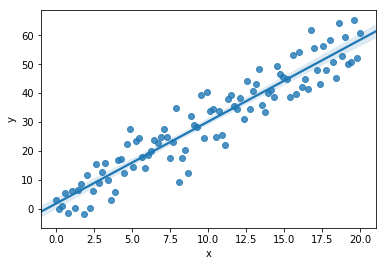

In [12]:
# plot
sns.regplot(df.x, df.y);

In [14]:
# split features and target
X = df[['constant', 'x']]
# fit model and summarize
sm.OLS(y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     780.3
Date:                Sun, 07 Apr 2019   Prob (F-statistic):           1.83e-48
Time:                        02:24:15   Log-Likelihood:                -318.65
No. Observations:                 100   AIC:                             641.3
Df Residuals:                      98   BIC:                             646.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
constant       1.8096      1.174      1.541      0.127      -0.521       4.140
x              2.8338      0.101     27.934      0.000       2.632       3.035
==============================================================================
Omnibus:                        1.006   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                0.995
Skew:                          -0.089   Prob(JB):                        0.608
Kurtosis:                       2.545   Cond. No.                         23.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Finding the same above using MLE

In [16]:
# We ll minimize the negative of log likelhood which is the same as maximizing the likelihood
# define likelihood function
def MLERegression(params):
 intercept, beta, sd = params[0], params[1], params[2] # inputs are guesses at our parameters
 yhat = intercept + beta*x # predictions
# next, we flip the Bayesian question
# compute PDF of observed values normally distributed around mean (yhat)
# with a standard deviation of sd
 negLL = -np.sum( stats.norm.logpdf(y, loc=yhat, scale=sd) )
# return negative LL
 return(negLL)

In [19]:
# let’s start with some random coefficient guesses and optimize
guess = np.array([5,5,2])
results = minimize(MLERegression, guess, method = 'Nelder-Mead', 
 options={'disp': True})

Optimization terminated successfully.
         Current function value: 318.645416
         Iterations: 111
         Function evaluations: 195


In [20]:
results # this gives us verbosity around our minimization
# notice our final key and associated values…

 final_simplex: (array([[1.80964116, 2.83377025, 5.85628486],
       [1.80958651, 2.83377225, 5.85626161],
       [1.80962719, 2.83376556, 5.85629   ],
       [1.80955893, 2.8337721 , 5.85629233]]), array([318.64541625, 318.64541625, 318.64541625, 318.64541625]))
           fun: 318.64541624805463
       message: 'Optimization terminated successfully.'
          nfev: 195
           nit: 111
        status: 0
       success: True
             x: array([1.80964116, 2.83377025, 5.85628486])

In [21]:
# drop results into df and round to match statsmodels
resultsdf = pd.DataFrame({'coef':results['x']})
resultsdf.index=['constant','x','sigma']   
np.round(resultsdf.head(2), 4)

,coef
constant,1.8096
x,2.8338
